In [1]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
from pathlib import Path
import os
from PIL import Image

In [2]:
images = "ImageClassificationProject/train/train/Plum/Plum_0.jpg"

In [3]:
img = mpimg.imread(images)

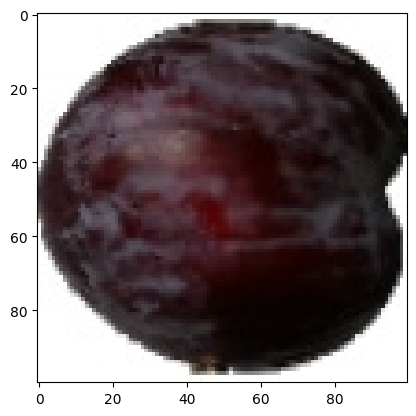

In [4]:
plt.imshow(img)

In [5]:
trainingDataset = "ImageClassificationProject/train/train"
testDataset = "ImageClassificationProject/test/test"
len(trainingDataset)

38

In [6]:
indexes = []
for i in range(len(trainingDataset)):
    indexes.append(i)
print(indexes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]


In [7]:
typesOfImages = []
trainingDataset = Path("ImageClassificationProject/train/train")
testDataset = Path("ImageClassificationProject/test/test")

for f in trainingDataset.iterdir():
    if f.is_dir():
        typesOfImages.append(f.name)
print(typesOfImages)

['Apple Braeburn', 'Apple Granny Smith', 'Apricot', 'Avocado', 'Banana', 'Blueberry', 'Cactus fruit', 'Cantaloupe', 'Cherry', 'Clementine', 'Corn', 'Cucumber Ripe', 'Grape Blue', 'Kiwi', 'Lemon', 'Limes', 'Mango', 'Onion White', 'Orange', 'Papaya', 'Passion Fruit', 'Peach', 'Pear', 'Pepper Green', 'Pepper Red', 'Pineapple', 'Plum', 'Pomegranate', 'Potato Red', 'Raspberry', 'Strawberry', 'Tomato', 'Watermelon']


In [8]:
def imageDetails(image):
    y = Image.open(image)
    print("image format:", y.format)
    print("image size:", y.size)
    print("image mode:", y.mode)

In [9]:
classes = typesOfImages

In [10]:
def getFruitImage():
    userWantsThisFruit = int(input("What fruit do you want?"))
    fruitType = typesOfImages[userWantsThisFruit] ## gets a fruit type, for eg, BlueBerry

    fruitType = os.path.join(trainingDataset, fruitType) ## gives you this: 'ImageClassificationProject\\train\\train\\Limes'
    
    fruitImage = os.listdir(fruitType) ## gives my everything with a sub folder for a fruit 

    useruserWantsThisFruitImage = int(input("Enter a number for what image you want:"))
    combined = fruitType + "\\" + fruitImage[useruserWantsThisFruitImage] ## gives you this: 'ImageClassificationProject\\train\\train\\Limes\\Limes_103.jpg'

    fruitContents = combined

    # imageDetails(fruitContents)
    
    img = mpimg.imread(fruitContents)
    plt.figure(figsize=(15, 2))
    plt.imshow(img)
    plt.xlabel(classes[userWantsThisFruit])

{0: 'Apple Braeburn', 1: 'Apple Granny Smith', 2: 'Apricot', 3: 'Avocado', 4: 'Banana', 5: 'Blueberry', 6: 'Cactus fruit', 7: 'Cantaloupe', 8: 'Cherry', 9: 'Clementine', 10: 'Corn', 11: 'Cucumber Ripe', 12: 'Grape Blue', 13: 'Kiwi', 14: 'Lemon', 15: 'Limes', 16: 'Mango', 17: 'Onion White', 18: 'Orange', 19: 'Papaya', 20: 'Passion Fruit', 21: 'Peach', 22: 'Pear', 23: 'Pepper Green', 24: 'Pepper Red', 25: 'Pineapple', 26: 'Plum', 27: 'Pomegranate', 28: 'Potato Red', 29: 'Raspberry', 30: 'Strawberry', 31: 'Tomato', 32: 'Watermelon'}


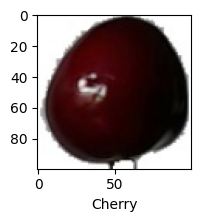

In [11]:
mapping = dict(zip(indexes, typesOfImages))
print(mapping)

getFruitImage()